In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [2]:
data = pd.read_csv(r'Live.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.shape

(7050, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
data.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [7]:
data.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [9]:
data.drop(['status_id','status_published'],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [11]:
data.head(20)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
5,photo,217,6,0,211,5,1,0,0,0
6,video,503,614,72,418,70,10,2,0,3
7,video,295,453,53,260,32,1,1,0,1
8,photo,203,1,0,198,5,0,0,0,0
9,photo,170,9,1,167,3,0,0,0,0


# Declare feature var and target var

In [12]:
X = pd.DataFrame(data.iloc[:,1:])
y = data['status_type']

In [13]:
X.shape,y.shape

((7050, 9), (7050,))

In [14]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [15]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


# Feature Scaling (MinMaxscalar)

In [16]:
cols = X.columns

In [17]:
cols

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [18]:
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()
X = MS.fit_transform(X)


In [19]:
X 

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.00636943, 0.01960784,
        0.        ],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.00636943, 0.        ,
        0.        ],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.        , 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
X = pd.DataFrame(X,columns=[cols])

In [21]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means model with  two clusters

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [35]:
pred = kmeans.fit_predict(X)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
data_with_cluster = data.copy()
data_with_cluster['cluster'] = pred


In [37]:
data_with_cluster.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,video,529,512,262,432,92,3,1,1,0,0
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0


# Use elbow method to find optimal number of clusters

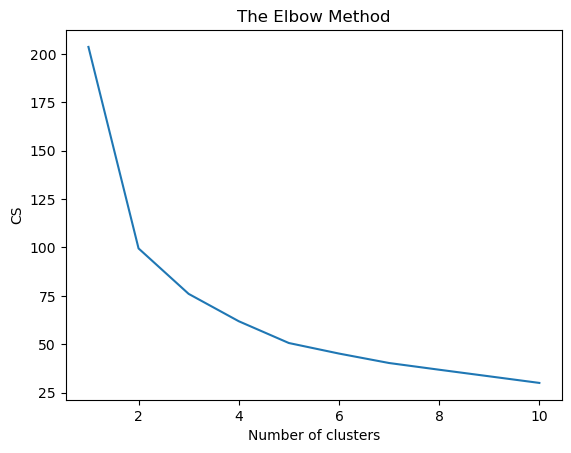

In [38]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# plot the dataset

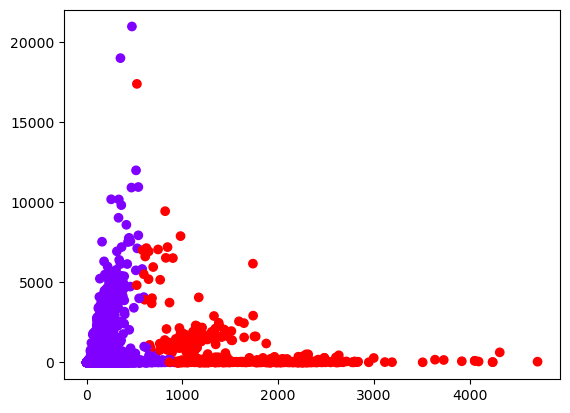

In [47]:
plt.scatter(data_with_cluster['num_likes'],data_with_cluster['num_comments'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.show()